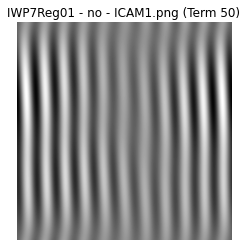

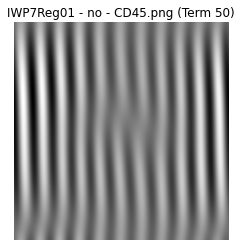

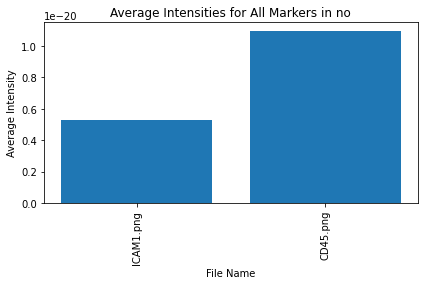

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    return np.sqrt((coords[0] - centre) ** 2 + (coords[1] - centre) ** 2)

def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]), centre + (centre - coords[1]))

folder_path = "/Users/ajahedi/OneDrive - Inside MD Anderson/CODEX Resources & Papers/qc folder/Stitching/Raw_tissue plots/IWP7/IWP7Reg01/no/"





# Extract the desired folder name from the path
folder_name = os.path.basename(os.path.dirname(folder_path))
current_folder_name = os.path.basename(folder_path.rstrip('/'))

# Extract the desired folder name from the path
folder_name = os.path.basename(os.path.dirname(folder_path))
match = re.search(r'IWP\d+Reg\d+', folder_path)
if match:
    plot_title_prefix = match.group()
else:
    plot_title_prefix = folder_name

# List all files in the directory
all_files = os.listdir(folder_path)

# Filter out only PNG files
png_files = [f for f in all_files if f.endswith('.png')]
average_intensities = []
file_names = []

for image_filename in png_files:
    full_image_path = os.path.join(folder_path, image_filename)
    image = plt.imread(full_image_path)
    image = image[:, :, :3].mean(axis=2)  # Convert to grayscale
    
    # Fourier transform
    ft = calculate_2dft(image)

    array_size = len(image)
    centre = int((array_size - 1) / 2)
    coords_left_half = ((x, y) for x in range(array_size) for y in range(centre+1))
    coords_left_half = sorted(coords_left_half, key=lambda x: calculate_distance_from_centre(x, centre))

    # Reconstruct image up to term 50
    rec_image = np.zeros(image.shape)
    individual_grating = np.zeros(image.shape, dtype="complex")

    for idx, coords in enumerate(coords_left_half, start=1):
        if idx > 5:
            break
        symm_coords = find_symmetric_coordinates(coords, centre)
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]
        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0

     # Display the reconstructed image after the 50th term with the title
    plt.figure()
    plt.imshow(rec_image, cmap="gray")
    plt.title(f"{plot_title_prefix} - {current_folder_name} - {image_filename} (Term 50)")
    plt.axis("off")
    plt.show()


    
    # Accumulate average intensity
    avg_intensity = np.mean(rec_image)
    average_intensities.append(avg_intensity)
    file_names.append(image_filename)

# Plot average intensities for all markers
plt.figure()
plt.bar(file_names, average_intensities)
plt.ylabel('Average Intensity')
plt.xlabel('File Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title(f'Average Intensities for All Markers in {current_folder_name}')  # Modified title
plt.show()





In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    return np.sqrt((coords[0] - centre) ** 2 + (coords[1] - centre) ** 2)

def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]), centre + (centre - coords[1]))

base_path = "/Users/ajahedi/OneDrive - Inside MD Anderson/CODEX Resources & Papers/qc folder/Stitching/Raw_tissue plots/"
iwp_number = 7  # Set the IWP number you're interested in
max_regions = 10  # Assuming a maximum of 10 regions; adjust as needed

for region_number in range(1, max_regions + 1):
    for folder in ['no', 'high']:
        folder_path = os.path.join(base_path, f"IWP{iwp_number}Reg{region_number:02}", folder)
        
        if not os.path.exists(folder_path):
            continue

        # Extract the desired folder name from the path
        folder_name = os.path.basename(os.path.dirname(folder_path))
        current_folder_name = os.path.basename(folder_path.rstrip('/'))
        match = re.search(r'IWP\d+Reg\d+', folder_path)
        if match:
            plot_title_prefix = match.group()
        else:
            plot_title_prefix = folder_name

        # List all files in the directory
        all_files = os.listdir(folder_path)

        # Filter out only PNG files
        png_files = [f for f in all_files if f.endswith('.png')]
        average_intensities = []
        file_names = []

        for image_filename in png_files:
            full_image_path = os.path.join(folder_path, image_filename)
            image = plt.imread(full_image_path)
            image = image[:, :, :3].mean(axis=2)  # Convert to grayscale
    
            # Fourier transform
            ft = calculate_2dft(image)
            array_size = len(image)
            centre = int((array_size - 1) / 2)
            coords_left_half = ((x, y) for x in range(array_size) for y in range(centre+1))
            coords_left_half = sorted(coords_left_half, key=lambda x: calculate_distance_from_centre(x, centre))

            # Reconstruct image up to term 50
            rec_image = np.zeros(image.shape)
            individual_grating = np.zeros(image.shape, dtype="complex")
            for idx, coords in enumerate(coords_left_half, start=1):
                if idx > 50:
                    break
                symm_coords = find_symmetric_coordinates(coords, centre)
                individual_grating[coords] = ft[coords]
                individual_grating[symm_coords] = ft[symm_coords]
                rec_grating = calculate_2dift(individual_grating)
                rec_image += rec_grating
                individual_grating[coords] = 0
                individual_grating[symm_coords] = 0

            # Display the reconstructed image after the 50th term with the title
            plt.figure()
            plt.imshow(rec_image, cmap="gray")
            plt.title(f"{plot_title_prefix} - {current_folder_name} - {image_filename} (Term 50)")
            plt.axis("off")
            plt.show()

            # Accumulate average intensity
            avg_intensity = np.mean(rec_image)
            average_intensities.append(avg_intensity)
            file_names.append(image_filename)

        # Plot average intensities for all markers
        plt.figure()
        plt.bar(file_names, average_intensities)
        plt.ylabel('Average Intensity')
        plt.xlabel('File Name')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.title(f'Average Intensities for All Markers in {current_folder_name}')
        plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    return np.sqrt((coords[0] - centre) ** 2 + (coords[1] - centre) ** 2)

def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]), centre + (centre - coords[1]))

base_path = "/Users/ajahedi/OneDrive - Inside MD Anderson/CODEX Resources & Papers/qc folder/Stitching/Raw_tissue plots/"
patient_folders = ["IWP7", "IWP8", "IWR7", "IWR8"]  # Specify the patient folders you're interested in
max_regions = 10  # Assuming a maximum of 10 regions; adjust as needed

for patient_folder in patient_folders:
    for region_number in range(1, max_regions + 1):
        for folder in ['no', 'high']:
            folder_path = os.path.join(base_path, f"{patient_folder}Reg{region_number:02}", folder)
            
            if not os.path.exists(folder_path):
                continue

            # Extract the desired folder name from the path
            folder_name = os.path.basename(os.path.dirname(folder_path))
            current_folder_name = os.path.basename(folder_path.rstrip('/'))
            match = re.search(r'IWP\d+Reg\d+', folder_path)
            if match:
                plot_title_prefix = match.group()
            else:
                plot_title_prefix = folder_name

            # List all files in the directory
            all_files = os.listdir(folder_path)

            # Filter out only PNG files
            png_files = [f for f in all_files if f.endswith('.png')]
            average_intensities = []
            file_names = []

            for image_filename in png_files:
                full_image_path = os.path.join(folder_path, image_filename)
                image = plt.imread(full_image_path)
                image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

                # Fourier transform
                ft = calculate_2dft(image)
                array_size = len(image)
                centre = int((array_size - 1) / 2)
                coords_left_half = ((x, y) for x in range(array_size) for y in range(centre+1))
                coords_left_half = sorted(coords_left_half, key=lambda x: calculate_distance_from_centre(x, centre))

                # Reconstruct image up to term 50
                rec_image = np.zeros(image.shape)
                individual_grating = np.zeros(image.shape, dtype="complex")
                for idx, coords in enumerate(coords_left_half, start=1):
                    if idx > 50:
                        break
                    symm_coords = find_symmetric_coordinates(coords, centre)
                    individual_grating[coords] = ft[coords]
                    individual_grating[symm_coords] = ft[symm_coords]
                    rec_grating = calculate_2dift(individual_grating)
                    rec_image += rec_grating
                    individual_grating[coords] = 0
                    individual_grating[symm_coords] = 0

                # Display the reconstructed image after the 50th term with the title
                plt.figure()
                plt.imshow(rec_image, cmap="gray")
                plt.title(f"{plot_title_prefix} - {current_folder_name} - {image_filename} (Term 50)")
                plt.axis("off")
                plt.show()

                # Accumulate average intensity
                avg_intensity = np.mean(rec_image)
                average_intensities.append(avg_intensity)
                file_names.append(image_filename)

            # Plot average intensities for all markers
            plt.figure()
            plt.bar(file_names, average_intensities)
            plt.ylabel('Average Intensity')
            plt.xlabel('File Name')
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.title(f'Average Intensities for All Markers in {current_folder_name}')
            plt.show()


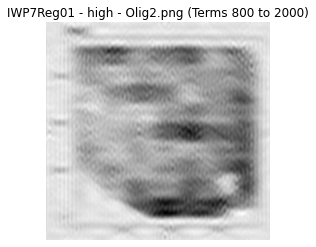

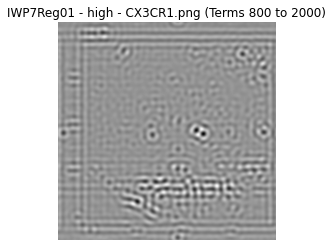

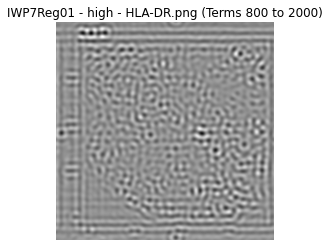

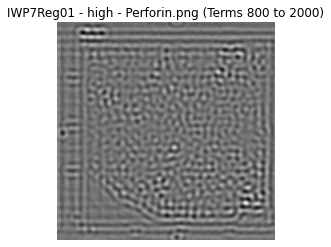

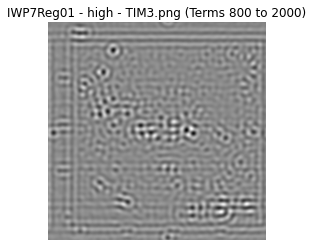

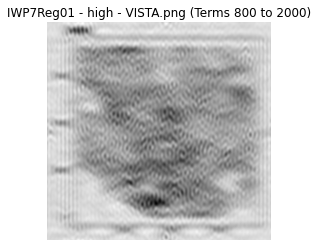

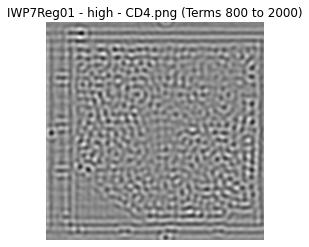

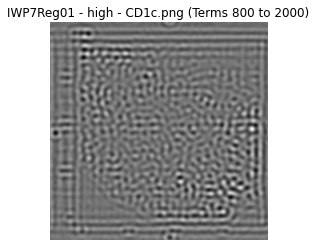

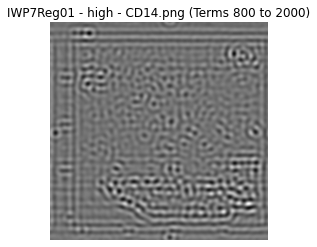

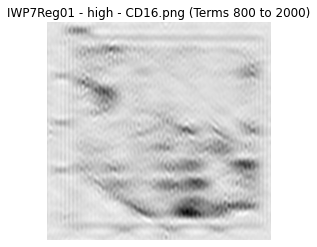

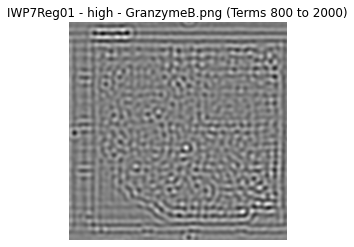

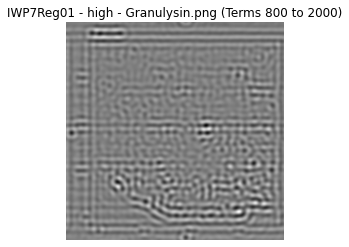

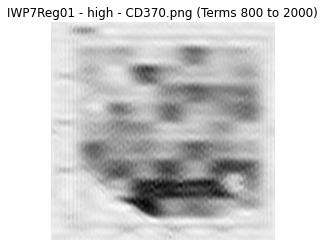

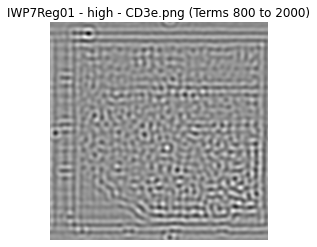

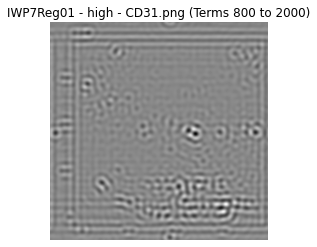

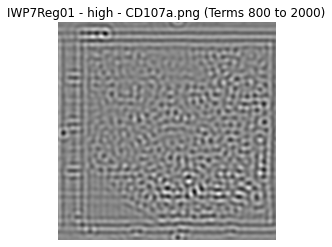

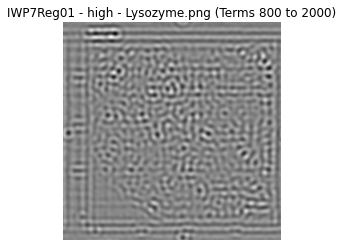

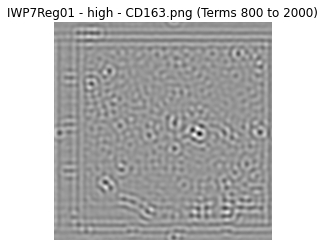

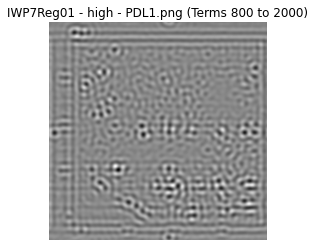

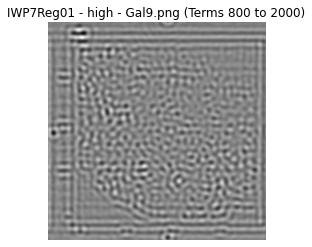

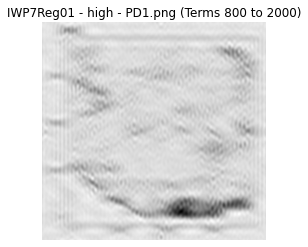

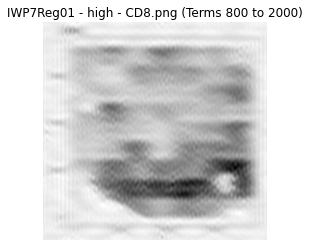

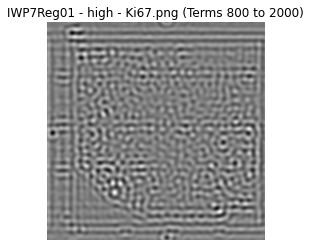

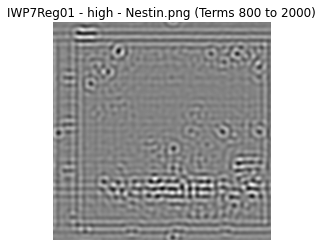

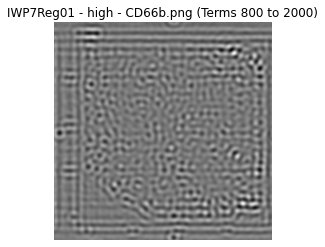

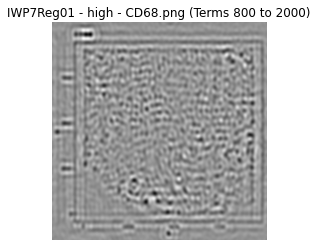

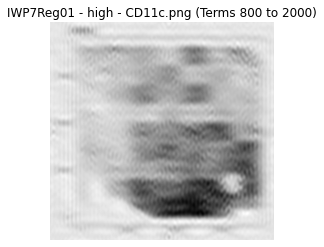

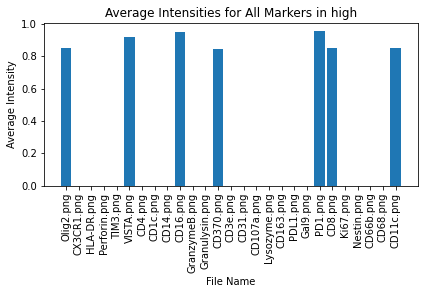